In [1]:
from initial_dataset import InitialDataset
from verstack import LGBMTuner
import h5py
import pandas as pd
import numpy as np

2023-05-05 19:59:09.134597: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 19:59:10.335338: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-05 19:59:10.335464: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-05-05 19:59:10.335475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
def _load_data(name):
    file_extension_length = len(".h5")
    with h5py.File(f'{name}', 'r') as f:
        filename = name.split('/')[-1][:-file_extension_length]
        return pd.DataFrame(f[filename][:], dtype=np.float32)

path="../data/initial/train.h5"
variables_path="../data/initial/variables.txt"
label_name='Truth'

all_data = _load_data(path)
with open(variables_path, 'r') as file:
    variables = file.read()
variables = variables.replace("'", "")
variables = variables.replace(" ", "")
variables = variables.replace("\n", "")
variables = variables.split(",")
features = all_data[variables]
labels = all_data[label_name]

print(features.head())
print(labels.head())

   actualInteractionsPerCrossing  averageInteractionsPerCrossing   
0                          26.50                           26.50  \
1                          35.50                           35.50   
2                          29.49                           29.49   
3                          37.50                           37.50   
4                          59.50                           59.50   

   correctedActualMu  correctedAverageMu  correctedScaledActualMu   
0              26.50               26.50                    26.50  \
1              35.50               35.50                    35.50   
2              29.49               29.49                    29.49   
3              37.50               37.50                    37.50   
4              59.50               59.50                    59.50   

   correctedScaledAverageMu  NvtxReco  p_nTracks    p_pt_track     p_eta  ...   
0                     26.50      18.0        3.0  42011.792969  1.834715  ...  \
1             


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: accuracy 
     .. Study direction: minimize log_loss

     . Trial number: 0 finished
     .. Optimization score (lower-better): log_loss: 0.13645704437973127
     .. Evaluation score (greater-better): accuracy: 0.9468307692307693
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): log_loss: 0.1384174028185976
     .. Evaluation score (greater-better): accuracy: 0.9454030769230769
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): log_loss: 0.1346196480044461
     .. Evaluation score (greater-better): accuracy: 0.9474461538461538
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): log_loss: 0.

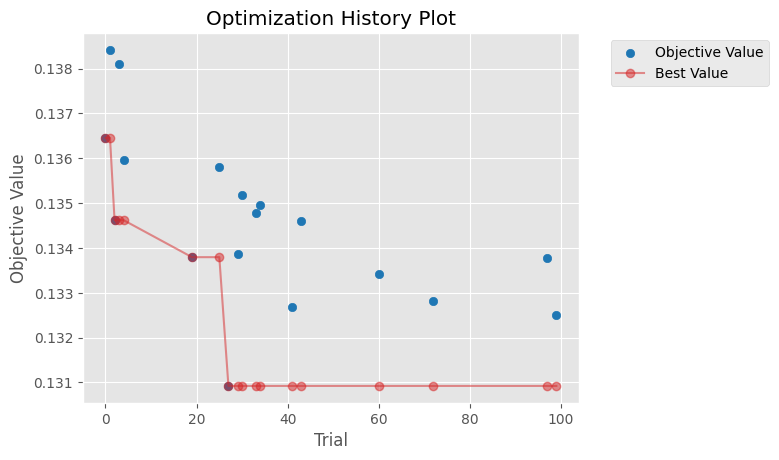

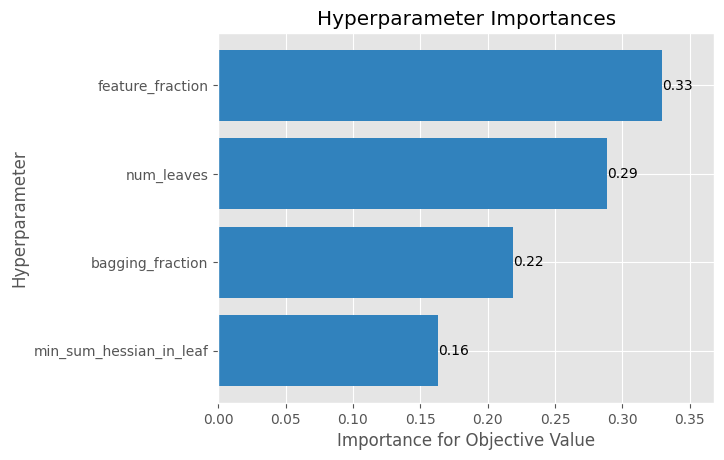

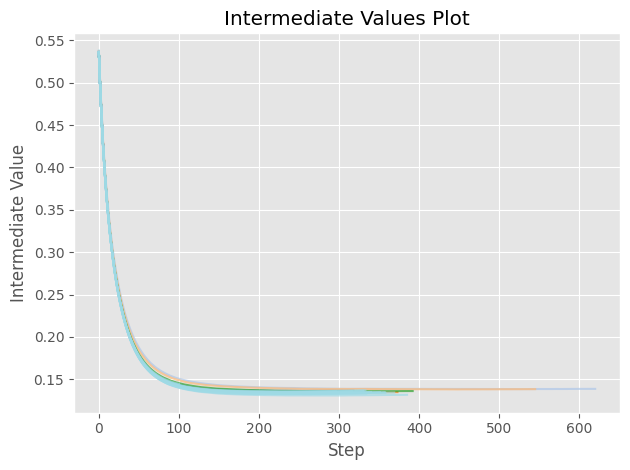

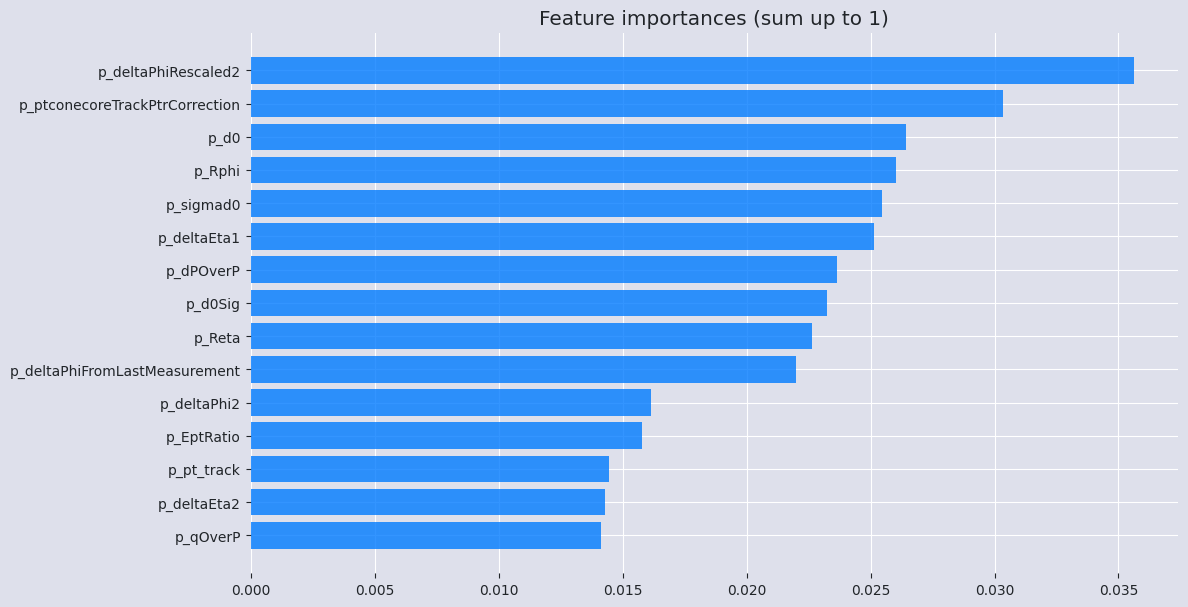


     . Optuna hyperparameters optimization finished
     .. Best trial number:27    |     log_loss:          0.13092349744713047
 ---------------------------------------------------------------------------
     . num_iterations optimization finished
     .. best iteration:  266   |     accuracy:           0.9481846153846154

Time elapsed for fit execution: 14 min 35.29 sec


In [4]:
tuner = LGBMTuner(metric="accuracy",
                  device_type="cpu")
tuner.fit(features, labels)

In [20]:
feature_importance_list = [(tuner.feature_importances[i], features.columns[i]) for i in range(len(features.columns))]
top_features = [tup[1] for tup in sorted(feature_importance_list)[::-1]]
print(top_features[:15])

['p_deltaPhiRescaled2', 'p_ptconecoreTrackPtrCorrection', 'p_d0', 'p_Rphi', 'p_sigmad0', 'p_deltaEta1', 'p_dPOverP', 'p_d0Sig', 'p_Reta', 'p_deltaPhiFromLastMeasurement', 'p_deltaPhi2', 'p_EptRatio', 'p_pt_track', 'p_deltaEta2', 'p_qOverP']



 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 100 trials
     .. Evaluation metric: accuracy 
     .. Study direction: minimize log_loss

     . Trial number: 0 finished
     .. Optimization score (lower-better): log_loss: 0.1367252897047593
     .. Evaluation score (greater-better): accuracy: 0.9460184615384616
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): log_loss: 0.13591494737442622
     .. Evaluation score (greater-better): accuracy: 0.9465107692307693
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): log_loss: 0.13742177235649589
     .. Evaluation score (greater-better): accuracy: 0.94656
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): log_loss: 0.1354416161

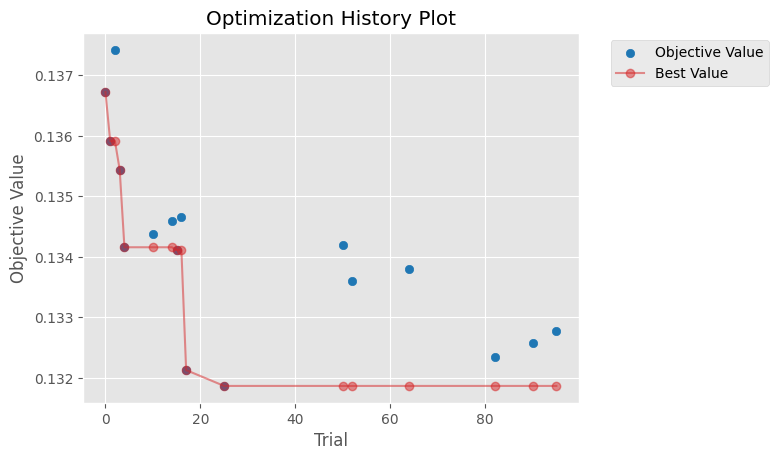

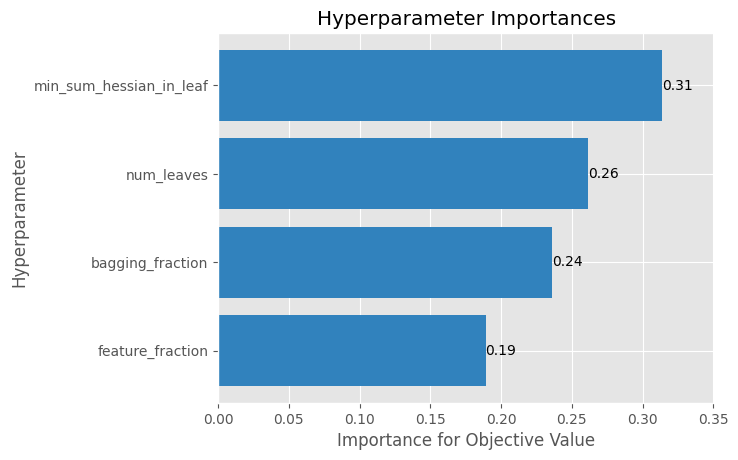

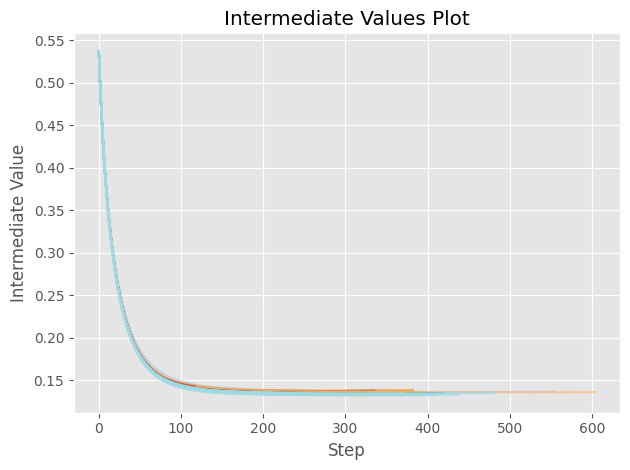

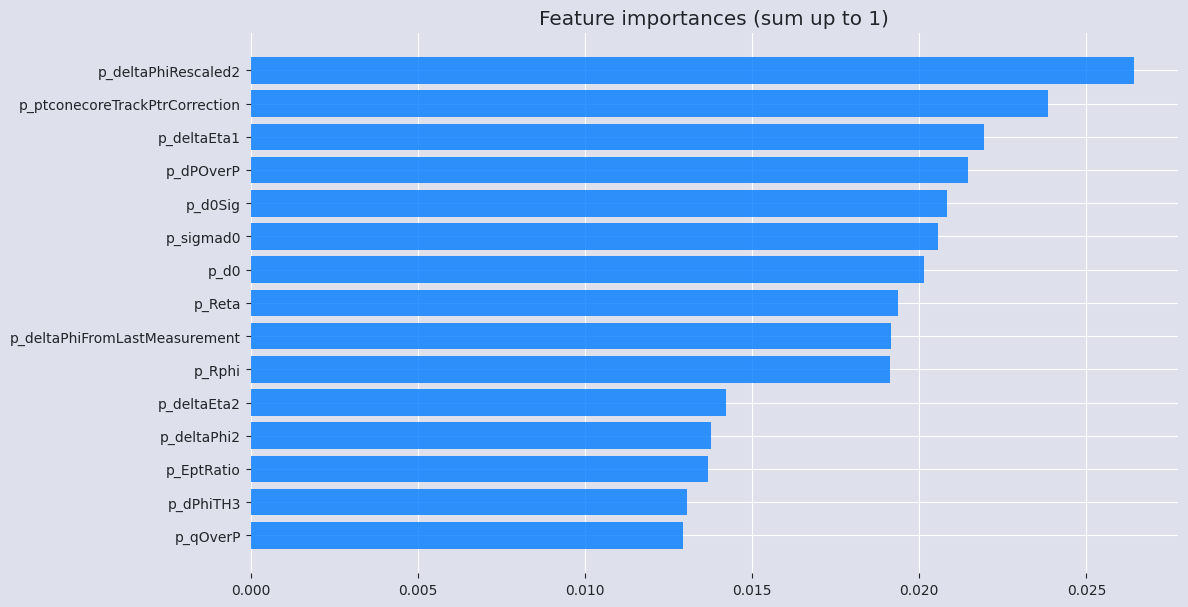


     . Optuna hyperparameters optimization finished
     .. Best trial number:25    |     log_loss:           0.1318671415534753
 ---------------------------------------------------------------------------
     . num_iterations optimization finished
     .. best iteration:  611   |     accuracy:           0.9477661538461538

Time elapsed for fit execution: 15 min 53.466 sec


In [21]:
features_reduced = features[top_features]
tuner_reduced = LGBMTuner(metric="accuracy")
tuner_reduced.fit(features_reduced, labels)

In [25]:
import pickle

with open("/home/amh/Documents/coding/GitHub/AppliedML2023/data/initial/lgbm_params.pickle", "wb") as handle:
    pickle.dump(tuner_reduced.best_params, handle, protocol=pickle.HIGHEST_PROTOCOL)


with open("/home/amh/Documents/coding/GitHub/AppliedML2023/data/initial/lgbm_tuner.pickle", "wb") as handle:
    pickle.dump(tuner_reduced.best_params, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("done")

done
